<a href="https://colab.research.google.com/github/thiagoteles10/acidentes_aeronauticos/blob/main/acidentes_aeron%C3%A1uticos(parte2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [28]:
df_ocorrencia = pd.read_csv('occurrences.csv', encoding='latin-1')

## **Verificando as colunas e linhas**

In [29]:
df_ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2027 non-null   int64  
 1   occurrence_id          2027 non-null   int64  
 2   classification         2027 non-null   object 
 3   type of occurrence     2027 non-null   object 
 4   localization           2027 non-null   object 
 5   fu                     2027 non-null   object 
 6   country                2027 non-null   object 
 7   aerodrome              2024 non-null   object 
 8   occurrence_day         2027 non-null   object 
 9   time                   2027 non-null   object 
 10  under_investigation    2027 non-null   object 
 11  investigating_command  2027 non-null   object 
 12  investigation_status   1821 non-null   object 
 13  report_number          433 non-null    object 
 14  published_report       995 non-null    float64
 15  publ

## **Dados faltantes**

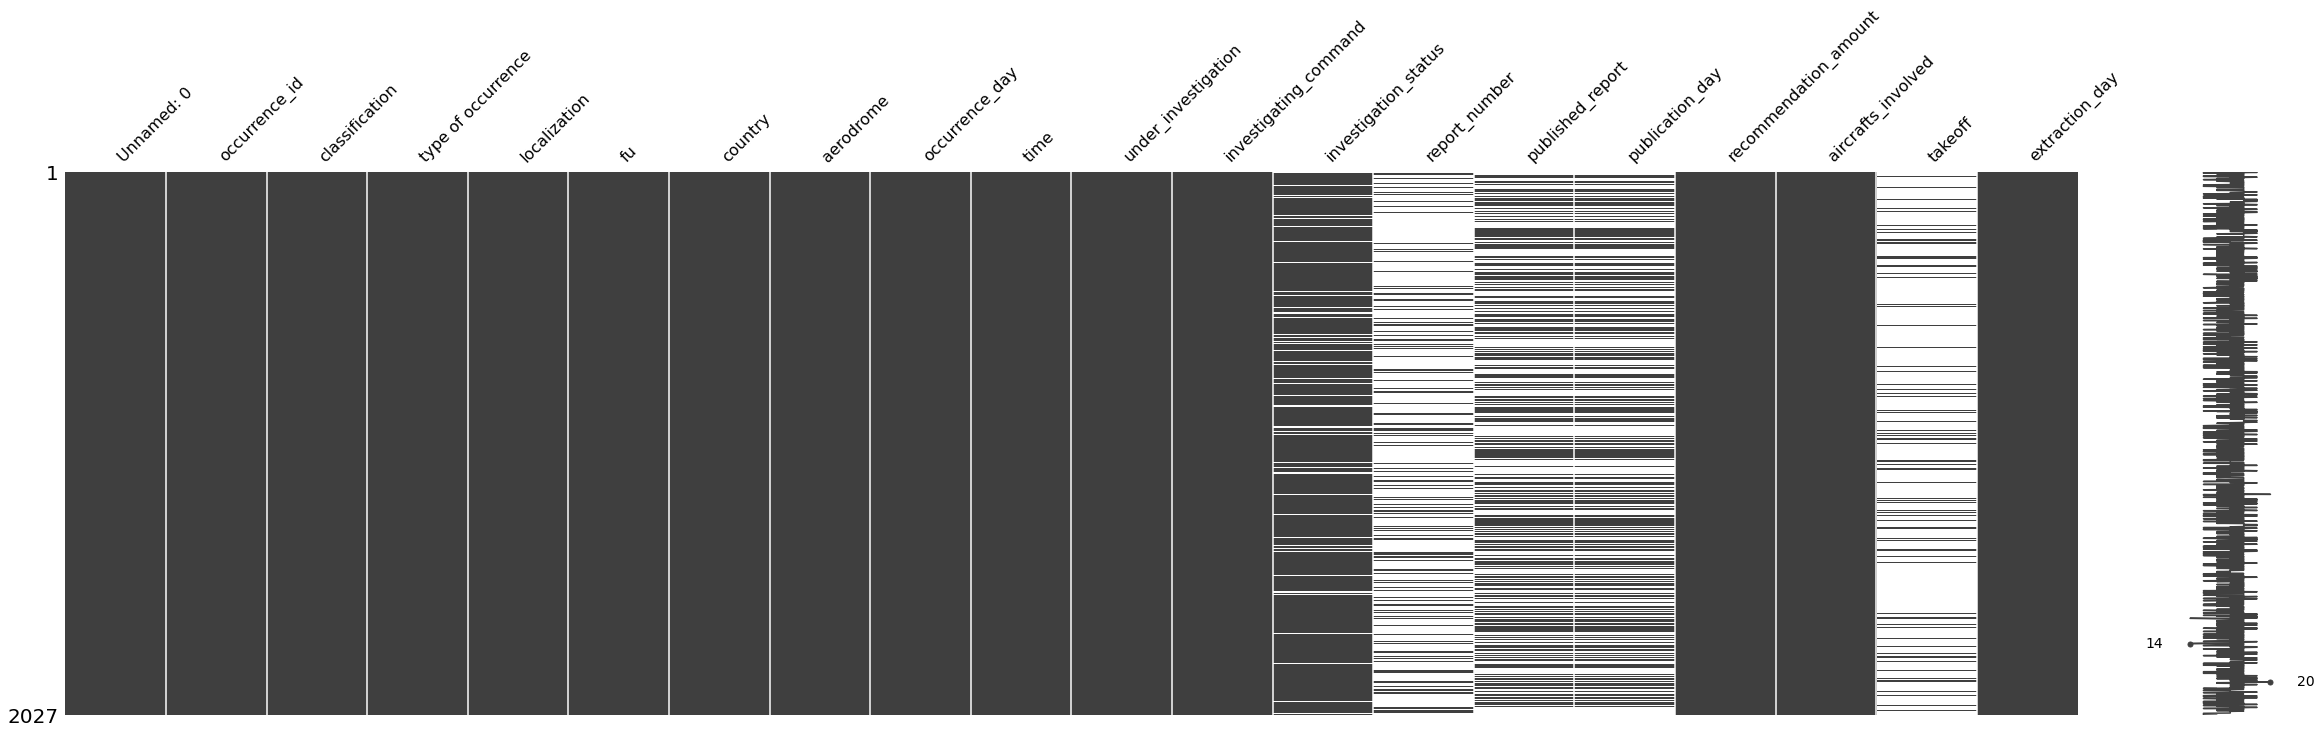

In [30]:
missingno.matrix(df_ocorrencia,figsize=(40,10))


In [31]:
df_ocorrencia.head(1)

,Unnamed: 0,occurrence_id,classification,type of occurrence,localization,fu,country,aerodrome,occurrence_day,time,under_investigation,investigating_command,investigation_status,report_number,published_report,publication_day,recommendation_amount,aircrafts_involved,takeoff,extraction_day
0,0,47965,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,ARIQUEMES,RO,BRAZIL,SJOG,2013-05-05,11:00:00,UNKNOWN,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30


## **Deletando a coluna unnamed**

In [32]:
df_ocorrencia.drop(['Unnamed: 0'], axis=1, inplace=True) 

In [7]:
df_ocorrencia.head(3)

,index,occurrence_id,classification,type of occurrence,localization,fu,country,aerodrome,occurrence_day,time,under_investigation,investigating_command,investigation_status,report_number,published_report,publication_day,recommendation_amount,aircrafts_involved,takeoff,extraction_day
0,0,47965,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,ARIQUEMES,RO,BRAZIL,SJOG,2013-05-05,11:00:00,UNKNOWN,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
1,1,50313,SERIOUS INCIDENT,LANDING WITHOUT LANDING GEAR,CACOAL,RO,BRAZIL,SSKW,2013-11-25,12:32:00,YES,SERIPA-7,FINISHED,NaN,1.0,2014-04-07,0,1,NaN,2016-07-30
2,2,34078,ACCIDENT,LOSS OF CONTROL ON THE GROUND,CEREJEIRAS,RO,BRAZIL,****,2008-08-07,15:10:00,YES,SERIPA-7,FINISHED,NaN,1.0,2016-07-07,0,1,1.0,2016-07-30


In [8]:
df_ocorrencia.columns

Index(['index', 'occurrence_id', 'classification', 'type of occurrence',
       'localization', 'fu', 'country', 'aerodrome', 'occurrence_day', 'time',
       'under_investigation', 'investigating_command', 'investigation_status',
       'report_number', 'published_report', 'publication_day',
       'recommendation_amount', 'aircrafts_involved', 'takeoff',
       'extraction_day'],
      dtype='object')

## **Como as ocorrências são classificadas**

In [9]:
print(df_ocorrencia['classification'].unique())

['ACCIDENT' 'SERIOUS INCIDENT']


## **Qual o total de ocorrências?**

In [10]:
print('o total de ocorrências é: ' + str(df_ocorrencia['classification'].count()))

o total de ocorrências é: 2027


## **Qual a quantidade de acidentes graves?**

In [11]:
print('o total de ocorrências graves foi de : ' + str(df_ocorrencia['classification'][df_ocorrencia['classification'] == 'SERIOUS INCIDENT'].count()))

o total de ocorrências graves foi de : 552


## **Qual foi a quantidade de acidentes menos graves?**

In [12]:
(print('o total de acidentes foi de : ' + str(df_ocorrencia['classification'][df_ocorrencia['classification'] == 'ACCIDENT'].count())))

o total de acidentes foi de : 1475


## **Quais os tipos de ocorrências?**

In [13]:
print(df_ocorrencia['type of occurrence'].unique())

['ENGINE FAILURE DURING THE FLIGHT' 'LANDING WITHOUT LANDING GEAR'
 'LOSS OF CONTROL ON THE GROUND' 'SLOW LANDING'
 'LOSS OF CONTROL IN THE AIR' 'UNKNOWN' 'ABOUT LANDING GEAR'
 'TERRAIN COLLISION' 'TRACK INCURSION'
 'METEOROLOGICAL PHENOMENOM IN THE AIR' 'HARD LANDING' 'ANOTHER TYPES'
 'ABOUT ROTOR' 'SYSTEM / COMPONENT FAILURE'
 'COLLISION AGAINST OBSTACLE DURING THE FLIGHT'
 'ABOUT WINDOWS / DOORS / WINDSHIELD'
 'LOSS OF COMPONENT DURING THE FLIGHT'
 'COLLISION AGAINST OBSTACLE ON THE GROUND' 'FIRE DURING THE FLIGHT'
 'LANDING BEFORE THE TRACK AREA' 'LOAD LAUNCH'
 'EXPLOSIVE / NOT INTENTIONAL DECOMPRESSION'
 'AIRCRAFTS COLLISION IN THE AIR' 'SPATIAL UNAWARENESS'
 'LANDING ON UNPREDICTABLE PLACE' 'TIRE BURST' 'FUEL STARVATION'
 'COMPONENT LOSS ON THE GROUND' 'ABOUT PROPELLER' 'LOW ALTITUDE MANEUVERS'
 'FIRE ON THE GROUND' 'VEHICLE COLLISION AGAINST AIRCRAFT'
 'FOD - DAMAGE CAUSED BY UNKNOWN OBJECT'
 'COLLISION DURING THE FLIGHT AGAINST TOWED OBJECT'
 'AIRCRAFT HIT BY OBJECT' 'METEOROLO

## **Qual a frequência por tipo de ocorrência?**

In [14]:
df_ocorrencia['type of occurrence'].value_counts()



ENGINE FAILURE DURING THE FLIGHT                    377
LOSS OF CONTROL ON THE GROUND                       325
LOSS OF CONTROL IN THE AIR                          310
COLLISION AGAINST OBSTACLE DURING THE FLIGHT        142
ABOUT LANDING GEAR                                  130
ANOTHER TYPES                                        87
FUEL STARVATION                                      74
SYSTEM / COMPONENT FAILURE                           61
UNKNOWN                                              57
LANDING WITHOUT LANDING GEAR                         54
LANDING ON UNPREDICTABLE PLACE                       44
HARD LANDING                                         40
COLLISION AGAINST OBSTACLE ON THE GROUND             40
SLOW LANDING                                         30
METEOROLOGICAL PHENOMENOM IN THE AIR                 27
LOSS OF COMPONENT DURING THE FLIGHT                  27
TERRAIN COLLISION                                    21
LOW ALTITUDE MANEUVERS                          

In [15]:
df_ocorrencia['type of occurrence'].unique()

array(['ENGINE FAILURE DURING THE FLIGHT', 'LANDING WITHOUT LANDING GEAR',
       'LOSS OF CONTROL ON THE GROUND', 'SLOW LANDING',
       'LOSS OF CONTROL IN THE AIR', 'UNKNOWN', 'ABOUT LANDING GEAR',
       'TERRAIN COLLISION', 'TRACK INCURSION',
       'METEOROLOGICAL PHENOMENOM IN THE AIR', 'HARD LANDING',
       'ANOTHER TYPES', 'ABOUT ROTOR', 'SYSTEM / COMPONENT FAILURE',
       'COLLISION AGAINST OBSTACLE DURING THE FLIGHT',
       'ABOUT WINDOWS / DOORS / WINDSHIELD',
       'LOSS OF COMPONENT DURING THE FLIGHT',
       'COLLISION AGAINST OBSTACLE ON THE GROUND',
       'FIRE DURING THE FLIGHT', 'LANDING BEFORE THE TRACK AREA',
       'LOAD LAUNCH', 'EXPLOSIVE / NOT INTENTIONAL DECOMPRESSION',
       'AIRCRAFTS COLLISION IN THE AIR', 'SPATIAL UNAWARENESS',
       'LANDING ON UNPREDICTABLE PLACE', 'TIRE BURST', 'FUEL STARVATION',
       'COMPONENT LOSS ON THE GROUND', 'ABOUT PROPELLER',
       'LOW ALTITUDE MANEUVERS', 'FIRE ON THE GROUND',
       'VEHICLE COLLISION AGAINST AIRCR

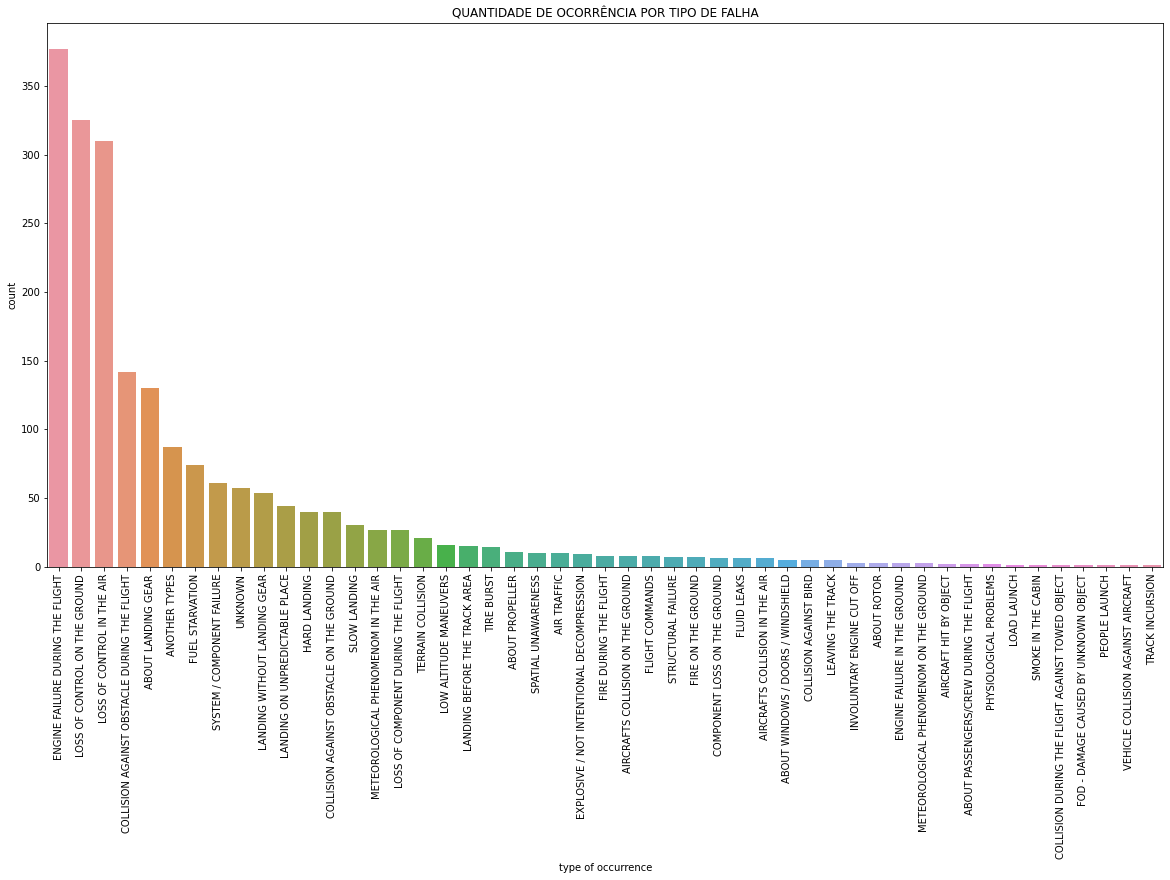

In [16]:
plt.figure(figsize=(20,10));
plt.title('QUANTIDADE DE OCORRÊNCIA POR TIPO DE FALHA')
sns.countplot(data=df_ocorrencia, x='type of occurrence', order=df_ocorrencia['type of occurrence'].value_counts().index);
plt.xticks(rotation=90);

## **Qual a frequência ocorrências por estado?**

In [51]:
df_ocorrencia['fu'].value_counts().head(27)

SP    434
RS    169
PR    154
MT    153
MG    152
GO    141
RJ    120
PA    119
BA     83
AM     81
MS     72
SC     58
MA     40
DF     30
TO     30
PE     29
RR     25
CE     25
PI     20
ES     16
RO     14
AC     14
AL     12
EX      8
SE      7
RN      7
AP      6
Name: fu, dtype: int64

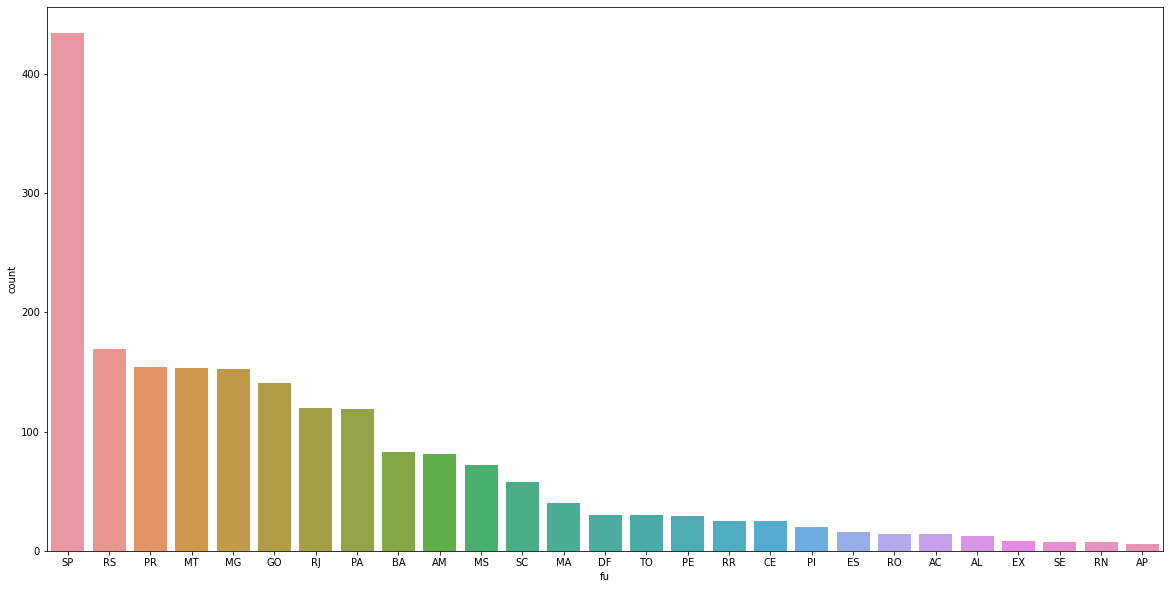

In [52]:
plt.figure(figsize=(20,10));
sns.countplot(data=df_ocorrencia, x='fu', order=df_ocorrencia['fu'].value_counts().head(27).index);



## **Número de ocorrências por cidade**

In [ ]:
for cidade in df_ocorrencia['localization'].unique():
   print(cidade + ' :' + str(df_ocorrencia['localization'][df_ocorrencia['localization'] == cidade].count()))

In [20]:
df_ocorrencia.head(1)

,index,occurrence_id,classification,type of occurrence,localization,fu,country,aerodrome,occurrence_day,time,under_investigation,investigating_command,investigation_status,report_number,published_report,publication_day,recommendation_amount,aircrafts_involved,takeoff,extraction_day
0,0,47965,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,ARIQUEMES,RO,BRAZIL,SJOG,2013-05-05,11:00:00,UNKNOWN,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
